<a href="https://colab.research.google.com/github/siddharthapramanik771/CNN-based-classification-architecture-for-classifying-images/blob/main/CNN_based_classification_architecture_for_classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np
import pandas as pd
from PIL import Image
from numpy import asarray
import random
from matplotlib import pyplot as plt
import seaborn as sns
import random
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD,Adam
#from keras.datasets import mnist

In [ ]:
path = '/content/drive/MyDrive/charts'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_image_data(path,color_type='RGB'):
  img = Image.open(path)
  img = img.convert(color_type)
  data = asarray(img)
  return data/255

In [ ]:
img_source = pd.read_csv(path+'/train_val.csv')

In [ ]:
img_source = img_source.to_dict('records')

In [ ]:
import copy
type_list = []
source = copy.deepcopy(img_source)
for i in source:
  # if i['image_index']%100 == 0: print(i['image_index'])
  i['image_data'] = get_image_data(path+'/train_val/'+str(i['image_index'])+'.png','LA')
  if i['type'] in type_list:
    i['type'] = type_list.index(i['type'])
  else:
    print(i['type'])
    type_list.append(i['type'])
    i['type'] = len(type_list)-1  

vbar_categorical
hbar_categorical
line
pie
dot_line


In [ ]:
random.shuffle(source)

In [ ]:
type_list

['vbar_categorical', 'hbar_categorical', 'line', 'pie', 'dot_line']

In [ ]:
data = pd.DataFrame(source)

In [ ]:
X = np.array([i['image_data'] for i in source])
Y = np.array([i['type'] for i in source])
X_train = X[:800]
X_val = X[800:]
Y_train = Y[:800]
Y_val = Y[800:]
# Y = to_categorical(Y)

In [ ]:
X_train.shape

(800, 128, 128, 2)

In [ ]:
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,2)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, batch_size=500, epochs=100,validation_data=(X_val, Y_val),callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 1.6619 - accuracy: 0.2013 - val_loss: 1.6082 - val_accuracy: 0.3900
Epoch 2/100
2/2 [==============================] - 0s 119ms/step - loss: 1.6015 - accuracy: 0.3212 - val_loss: 1.5903 - val_accuracy: 0.2050
Epoch 3/100
2/2 [==============================] - 0s 154ms/step - loss: 1.5935 - accuracy: 0.2313 - val_loss: 1.5716 - val_accuracy: 0.6450
Epoch 4/100
2/2 [==============================] - 0s 121ms/step - loss: 1.5646 - accuracy: 0.4863 - val_loss: 1.5236 - val_accuracy: 0.5250
Epoch 5/100
2/2 [==============================] - 0s 144ms/step - loss: 1.5035 - accuracy: 0.5437 - val_loss: 1.4158 - val_accuracy: 0.7300
Epoch 6/100
2/2 [==============================] - 0s 125ms/step - loss: 1.4006 - accuracy: 0.6612 - val_loss: 1.2640 - val_accuracy: 0.7200
Epoch 7/100
2/2 [==============================] - 0s 115ms/step - loss: 1.2315 - accuracy: 0.7225 - val_loss: 1.0561 - val_accuracy: 0.7550
Epoch 8/100
2/2 

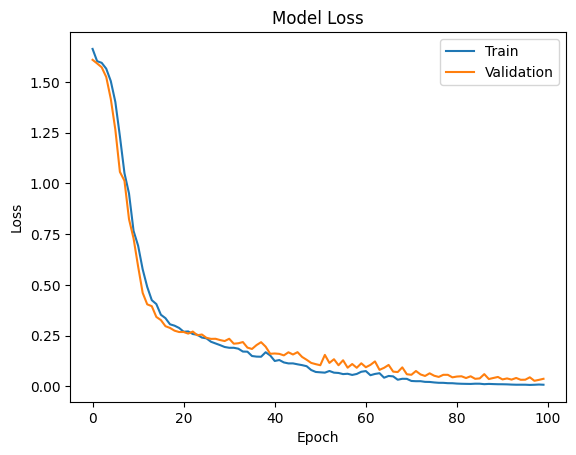

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

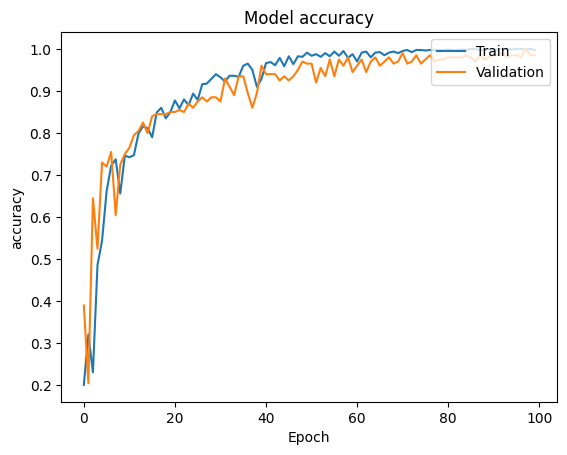

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
 cnn_model.evaluate(X_val,Y_val)

7/7 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.9850


[0.03699559345841408, 0.9850000143051147]

In [ ]:
X_test = {(path+'/test/'+i):get_image_data(path+'/test/'+i,'LA') for i in os.listdir(path+'/test')}

In [ ]:
def get_prediction(x):
  y = cnn_model.predict(np.array([x]))
  y = [np.argmax(element) for element in y]
  return type_list[y[0]]

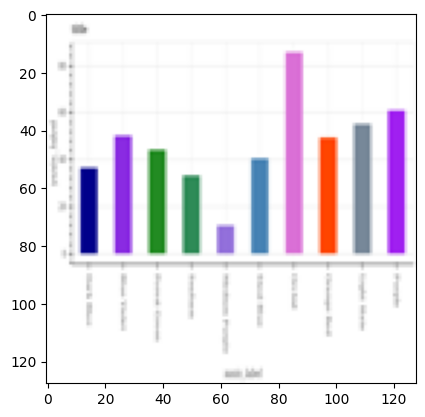

1/1 [==============================] - 0s 182ms/step
vbar_categorical


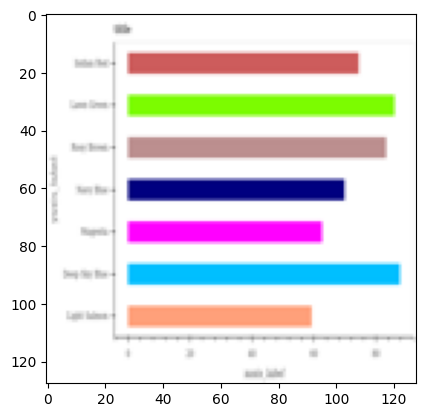

1/1 [==============================] - 0s 19ms/step
hbar_categorical


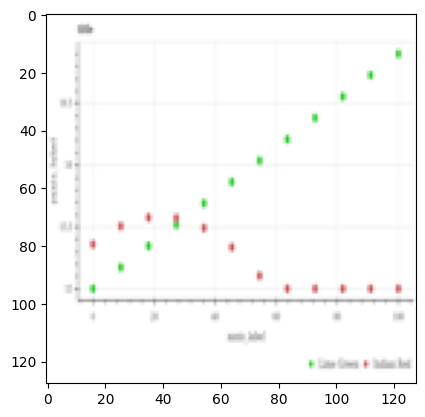

1/1 [==============================] - 0s 20ms/step
dot_line


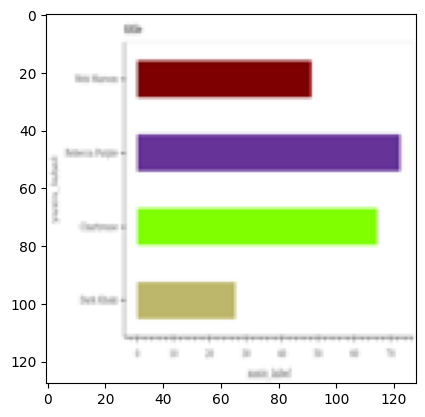

1/1 [==============================] - 0s 20ms/step
hbar_categorical


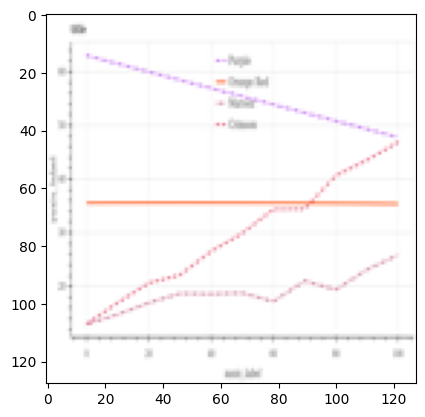

1/1 [==============================] - 0s 19ms/step
line


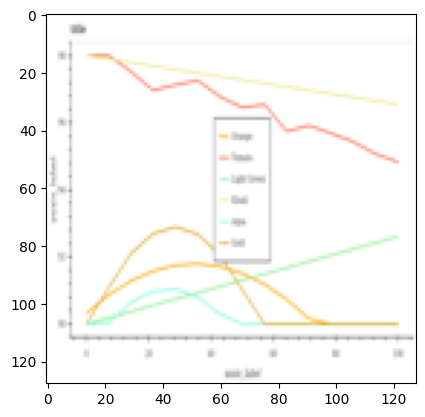

1/1 [==============================] - 0s 20ms/step
line


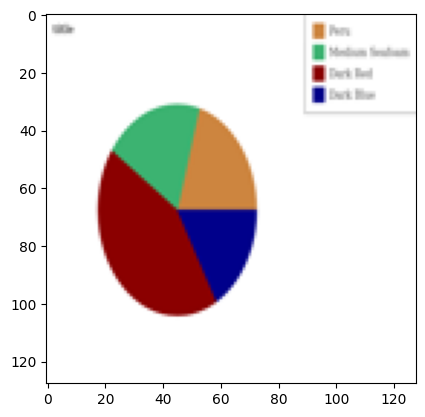

1/1 [==============================] - 0s 19ms/step
pie


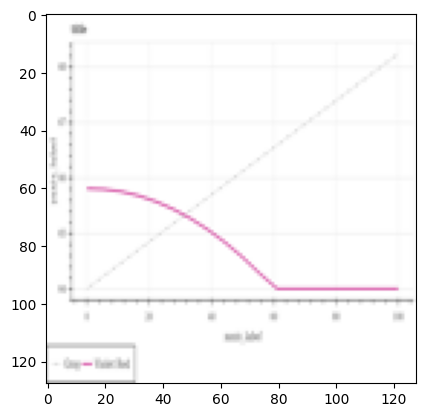

1/1 [==============================] - 0s 24ms/step
line


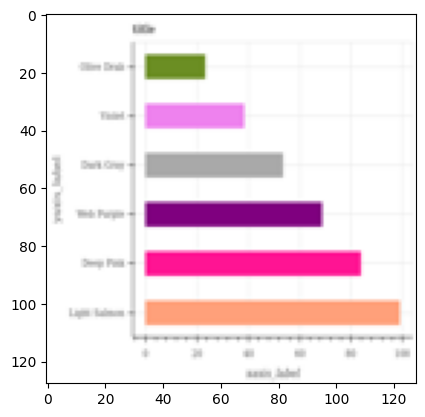

1/1 [==============================] - 0s 26ms/step
hbar_categorical


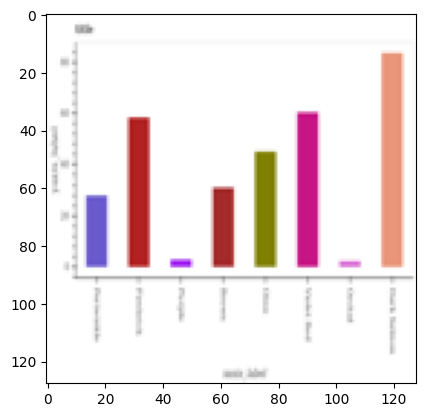

1/1 [==============================] - 0s 22ms/step
vbar_categorical


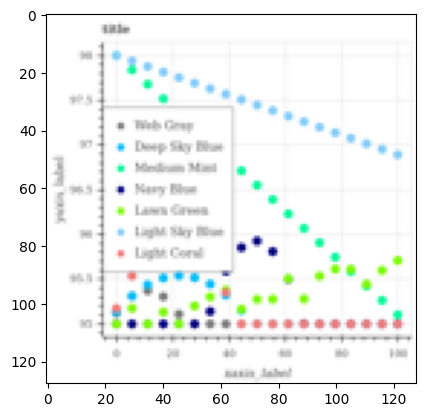

1/1 [==============================] - 0s 36ms/step
hbar_categorical


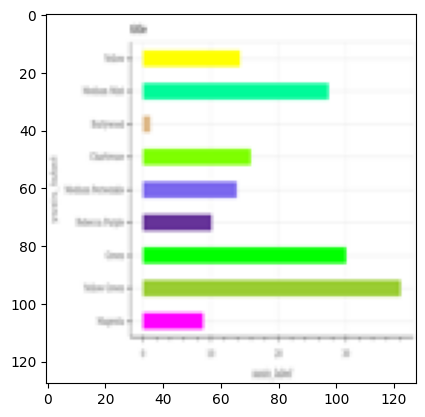

1/1 [==============================] - 0s 32ms/step
hbar_categorical


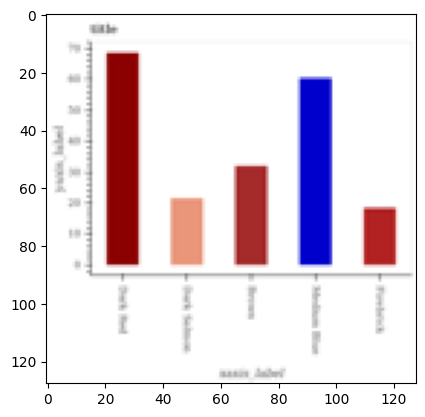

1/1 [==============================] - 0s 33ms/step
vbar_categorical


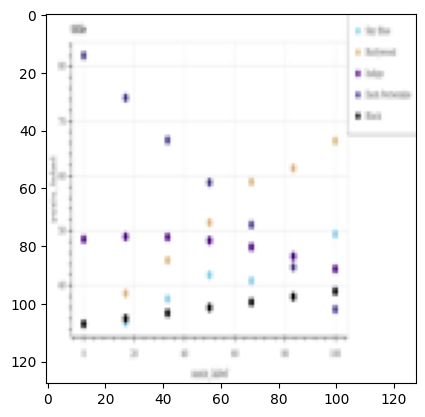

1/1 [==============================] - 0s 30ms/step
dot_line


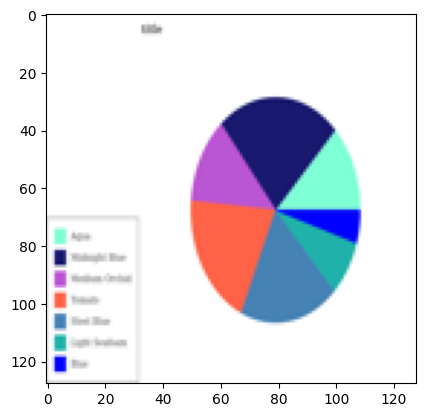

1/1 [==============================] - 0s 29ms/step
pie


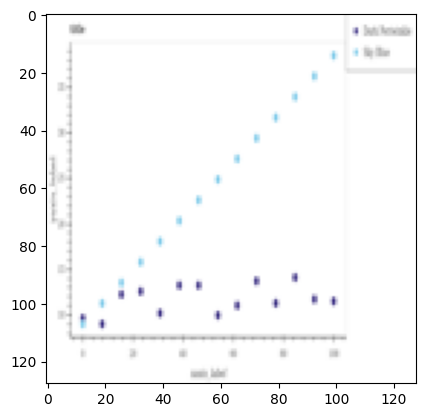

1/1 [==============================] - 0s 29ms/step
dot_line


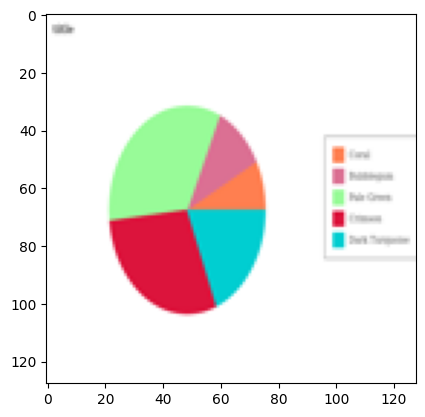

1/1 [==============================] - 0s 28ms/step
pie


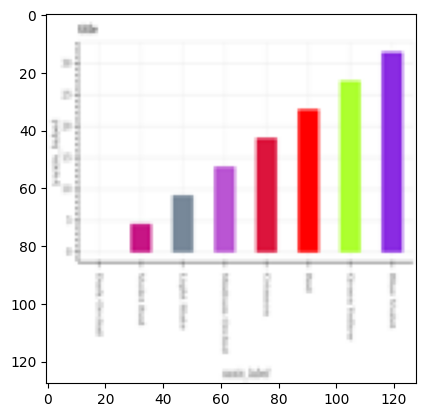

1/1 [==============================] - 0s 133ms/step
vbar_categorical


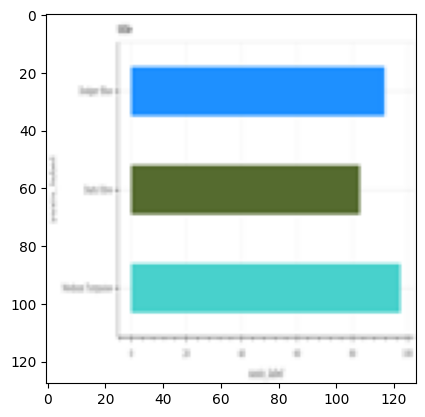

1/1 [==============================] - 0s 28ms/step
hbar_categorical


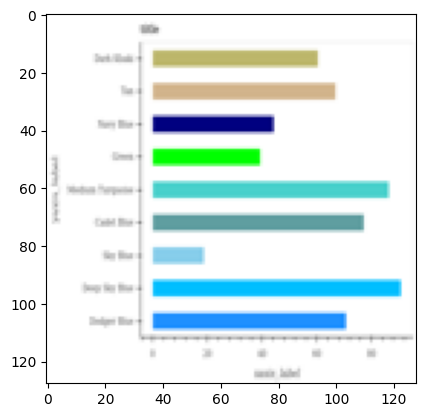

1/1 [==============================] - 0s 21ms/step
hbar_categorical


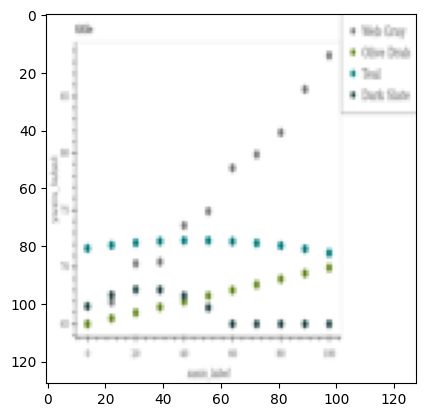

1/1 [==============================] - 0s 21ms/step
dot_line


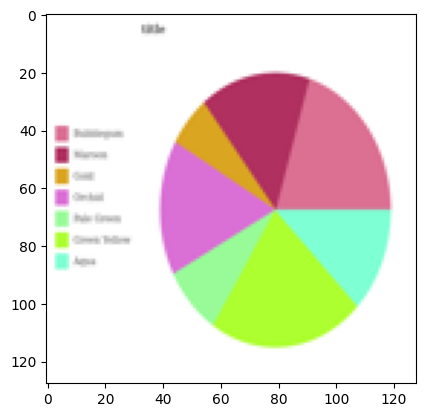

1/1 [==============================] - 0s 100ms/step
pie


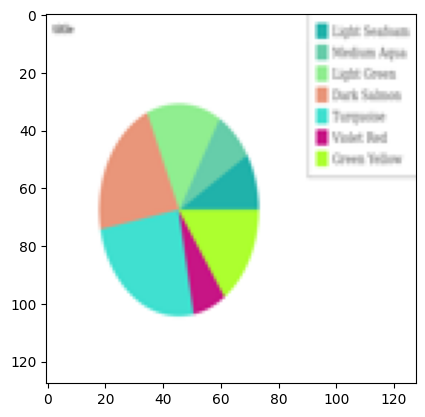

1/1 [==============================] - 0s 21ms/step
pie


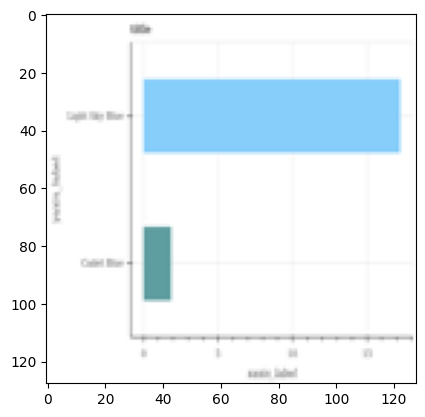

1/1 [==============================] - 0s 20ms/step
hbar_categorical


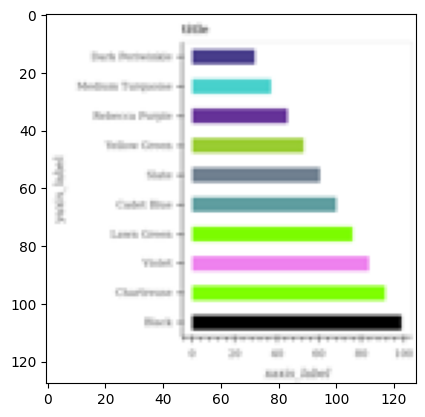

1/1 [==============================] - 0s 20ms/step
hbar_categorical


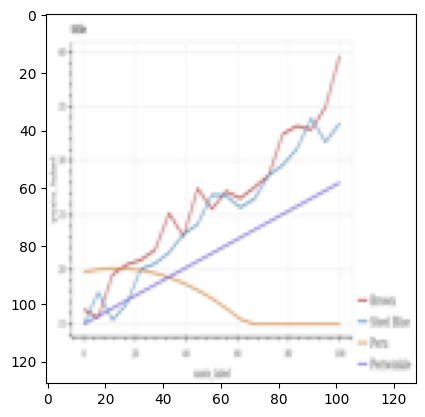

1/1 [==============================] - 0s 23ms/step
line


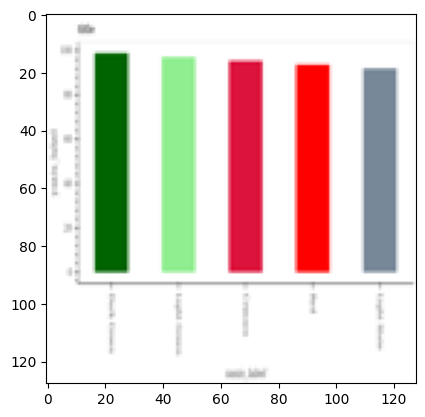

1/1 [==============================] - 0s 19ms/step
vbar_categorical


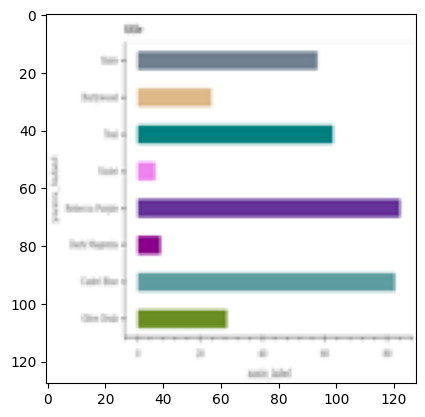

1/1 [==============================] - 0s 19ms/step
hbar_categorical


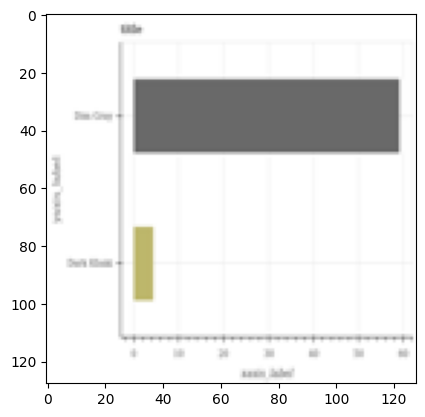

1/1 [==============================] - 0s 20ms/step
hbar_categorical


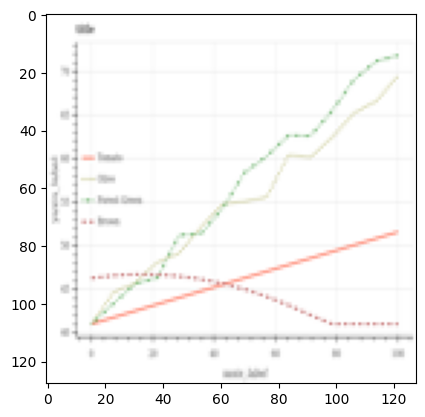

1/1 [==============================] - 0s 20ms/step
line


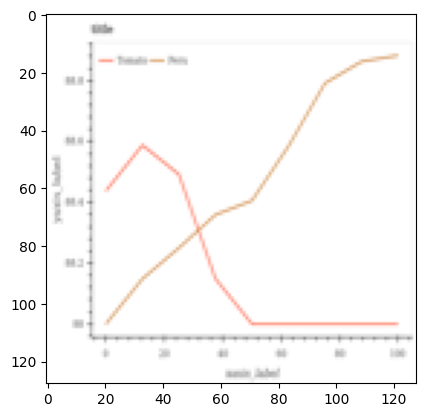

1/1 [==============================] - 0s 18ms/step
line


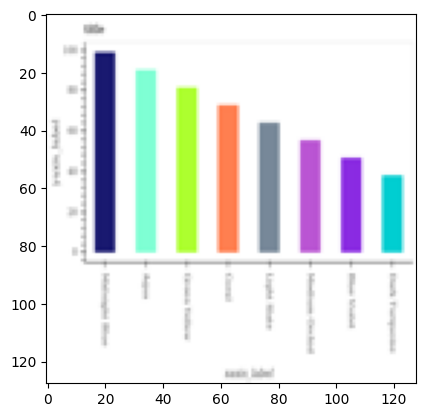

1/1 [==============================] - 0s 20ms/step
vbar_categorical


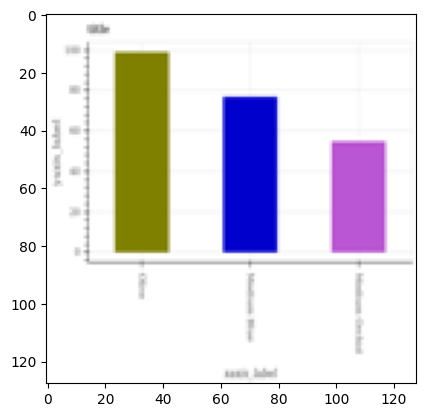

1/1 [==============================] - 0s 23ms/step
vbar_categorical


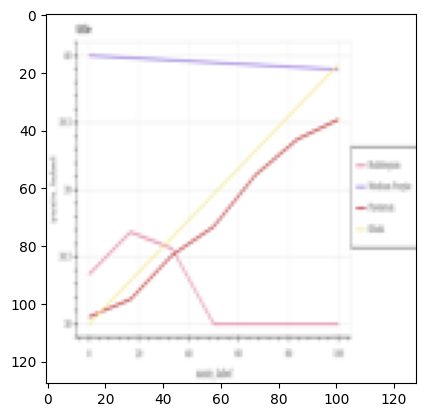

1/1 [==============================] - 0s 23ms/step
line


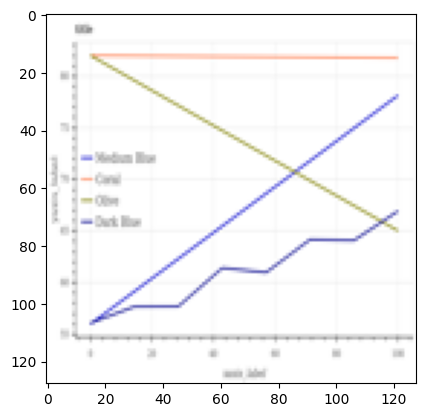

1/1 [==============================] - 0s 25ms/step
line


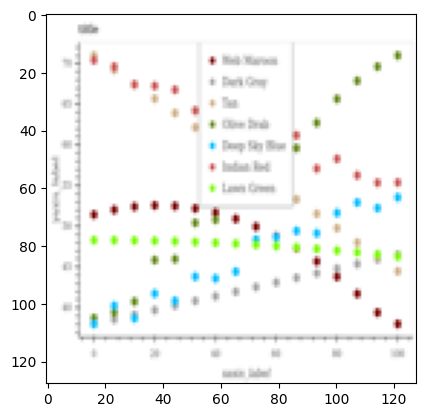

1/1 [==============================] - 0s 23ms/step
dot_line


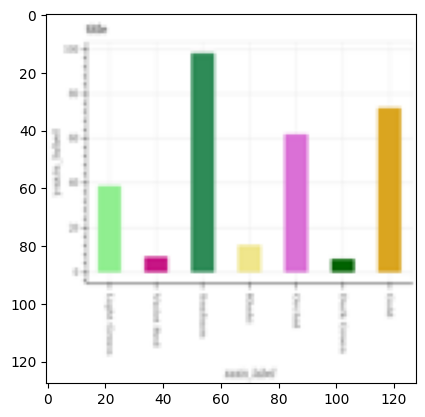

1/1 [==============================] - 0s 22ms/step
vbar_categorical


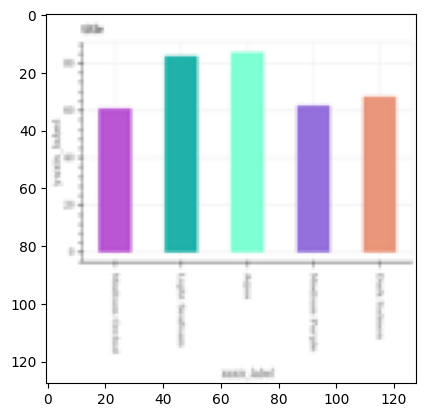

1/1 [==============================] - 0s 19ms/step
vbar_categorical


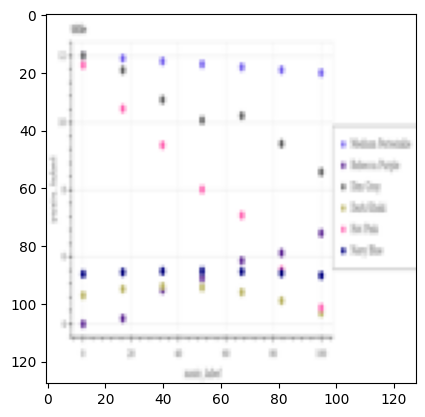

1/1 [==============================] - 0s 18ms/step
dot_line


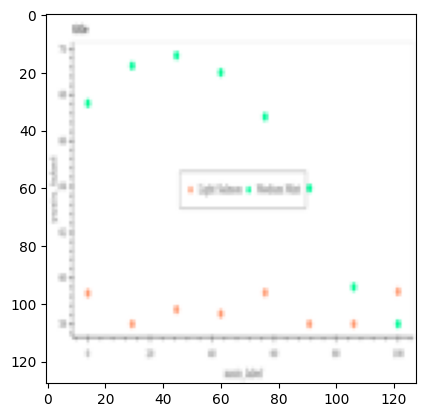

1/1 [==============================] - 0s 21ms/step
line


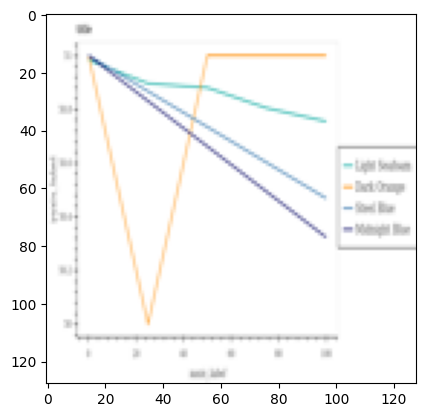

1/1 [==============================] - 0s 21ms/step
line


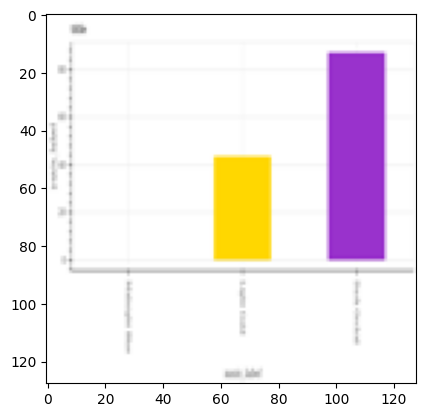

1/1 [==============================] - 0s 18ms/step
vbar_categorical


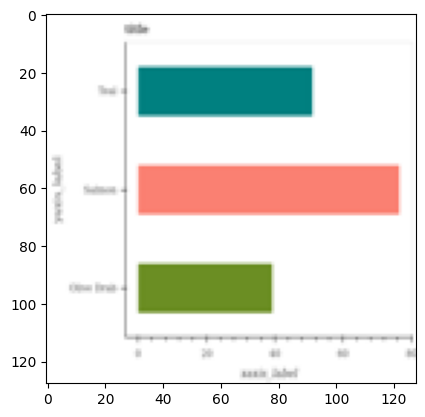

1/1 [==============================] - 0s 21ms/step
hbar_categorical


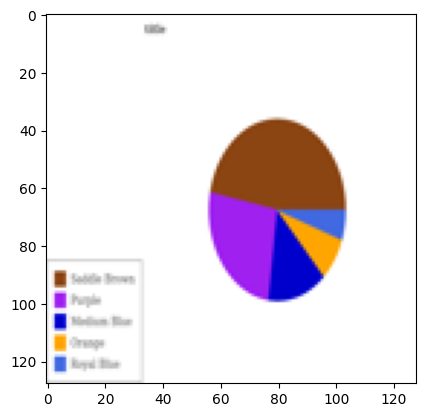

1/1 [==============================] - 0s 20ms/step
pie


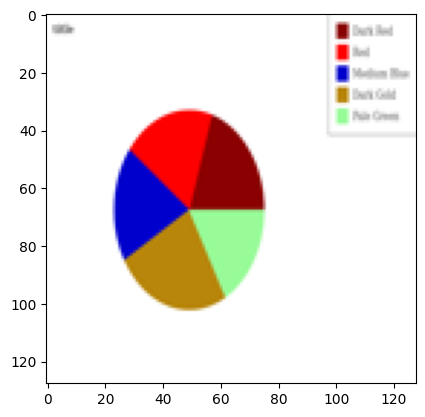

1/1 [==============================] - 0s 21ms/step
pie


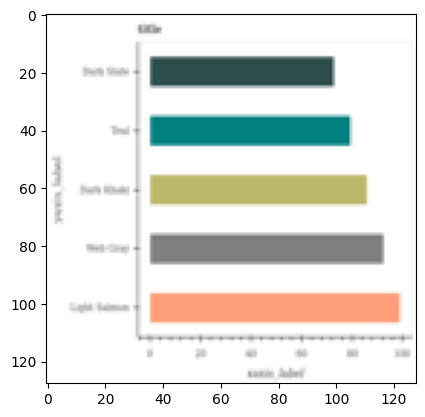

1/1 [==============================] - 0s 23ms/step
hbar_categorical


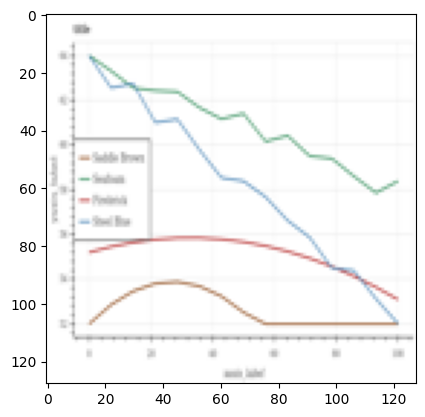

1/1 [==============================] - 0s 24ms/step
line


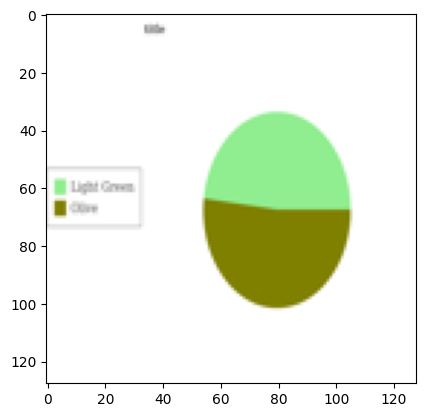

1/1 [==============================] - 0s 26ms/step
pie


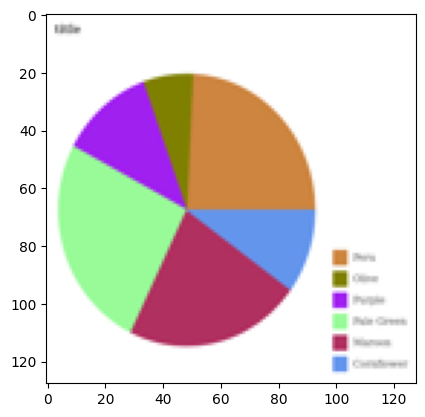

1/1 [==============================] - 0s 21ms/step
pie


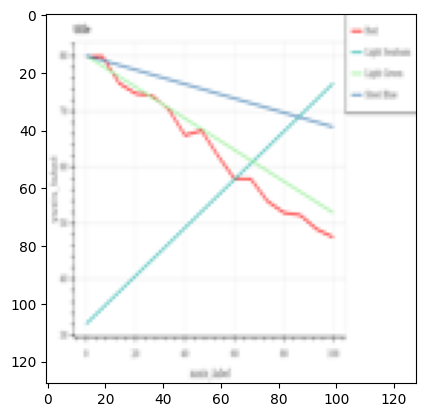

1/1 [==============================] - 0s 20ms/step
line


In [ ]:
for i in X_test:
  img = Image.open(i)
  plt.imshow(img)
  plt.show()
  print(get_prediction(X_test[i]))